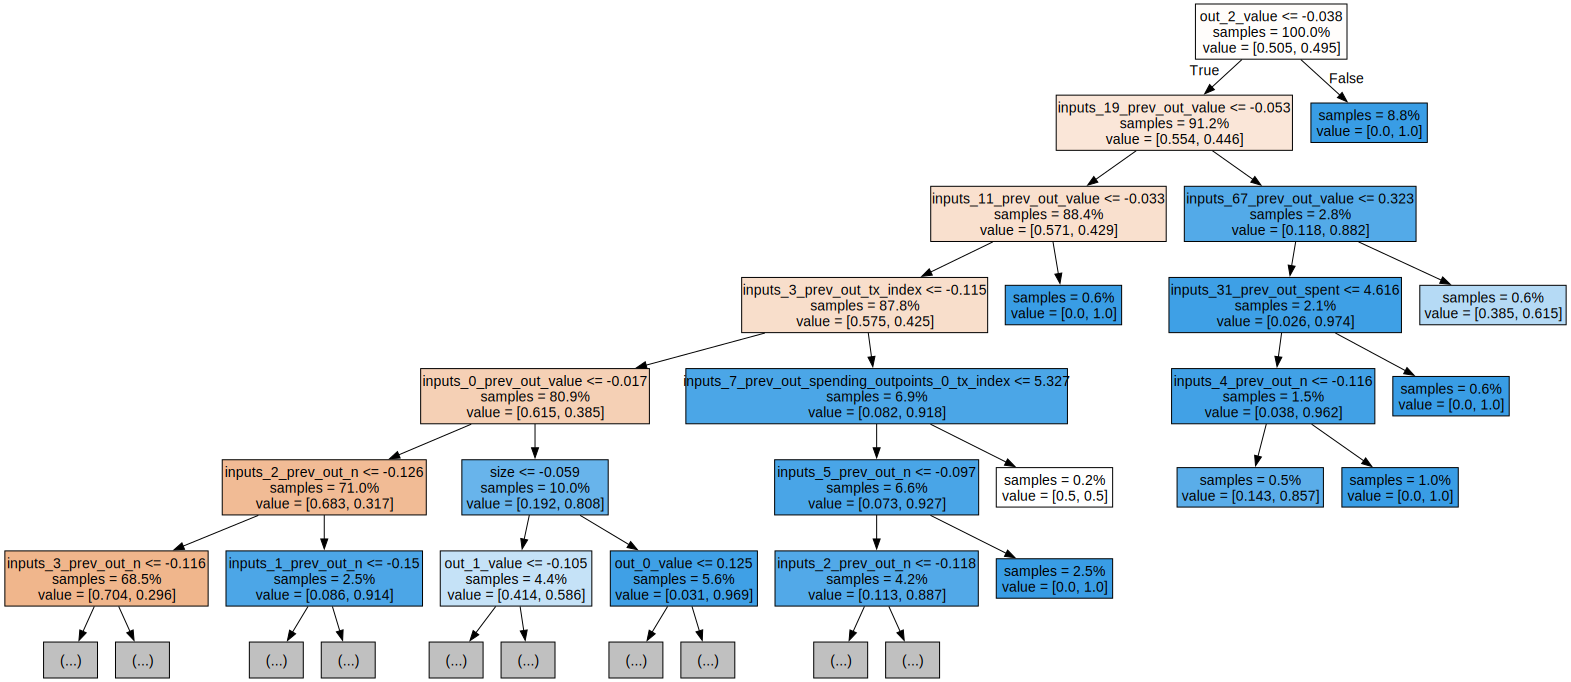

In [29]:
import json
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from pickle import load
import os
import pandas as pd


model_RF = load(open("../models/RF_model.sav", 'rb'))


features_json_file = "../pretrain/all_features.json"
with open(features_json_file, "r") as f:
    json_features = f.read()
features = json.loads(json_features)

os.environ["PATH"] += os.pathsep + "D:/Graphviz/bin"

# First tree from RF

tree = model_RF.estimators_[1]
dot_data = export_graphviz(tree,
                            feature_names=features,
                            filled=True,  
                            max_depth=6, 
                            impurity=False, 
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)




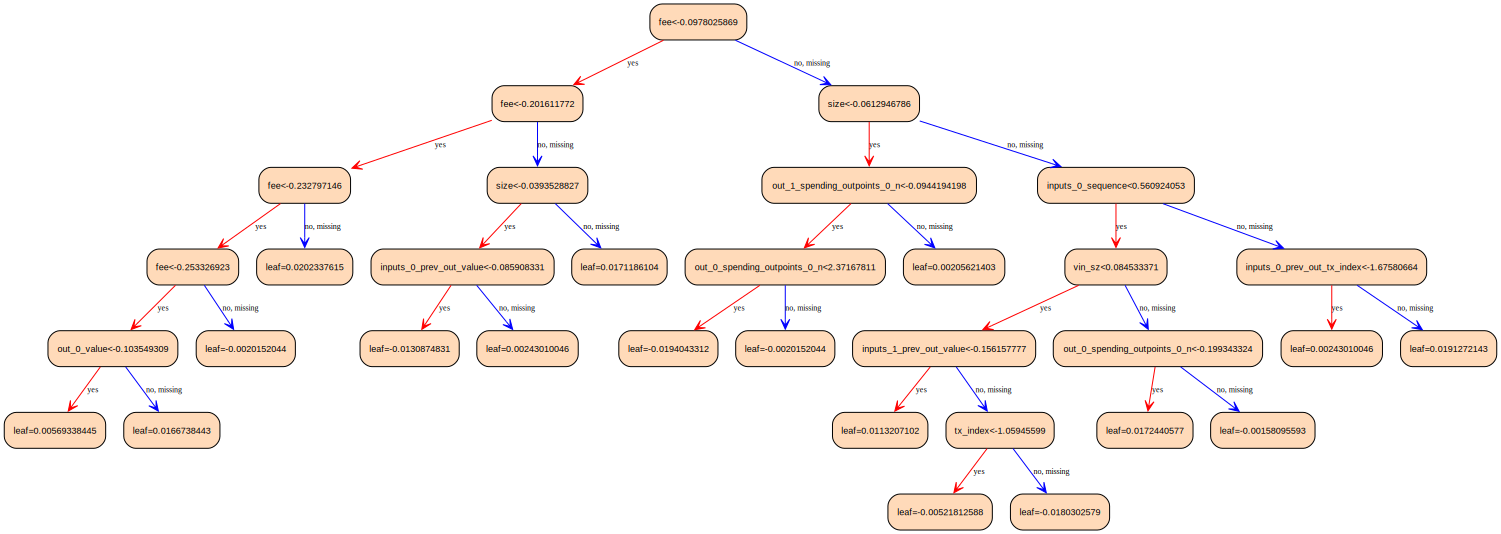

In [32]:
# First tree from XG

import xgboost as xgb
from graphviz import Source

# Load the model from the file
model_file = "../models/XG_model.sav"
model = load(open(model_file, 'rb'))

# Generate the Graphviz graph for the first tree
graph = xgb.to_graphviz(model, num_tree=0)

# Get the DOT source code
dot_source = graph.source

# Split the DOT source to insert custom styles
parts = dot_source.split("{", 1)
header = parts[0] + "{\n"
body = parts[1]

# Custom graph attributes
graph_attrs = '  graph [bgcolor="white", rankdir="TB", fontname="Arial", fontsize="10"];\n'

# Default node attributes (for internal nodes initially)
node_attrs = '  node [shape="box", style="rounded,filled", fillcolor="#FFDAB9", fontname="Arial", fontsize="9", fontcolor="black", color="black", penwidth="1"];\n'

# Default edge attributes
edge_attrs = '  edge [color="black", arrowhead="vee", fontsize="8"];\n'

# Construct the custom DOT source
custom_dot_source = header + graph_attrs + node_attrs + edge_attrs + body

# Create a new Source object with the customized DOT source code
styled_graph = Source(custom_dot_source)

# Further styling based on node content (identifying leaf nodes)
styled_dot_source_lines = styled_graph.source.split('\n')
final_dot_source_lines = [styled_dot_source_lines[0]]  # Keep the initial digraph line

for line in styled_dot_source_lines[1:-1]:  # Iterate through node and edge definitions
    if "label=" in line and "leaf=" in line:  # Identify leaf nodes (you might need to adjust this condition based on your DOT output)
        final_dot_source_lines.append(line.replace('fillcolor="#FFDAB9"', 'fillcolor="#ADD8E6"')) # LightBlue
    else:
        final_dot_source_lines.append(line)

final_dot_source_lines.append(styled_dot_source_lines[-1]) # Keep the closing }

final_styled_graph = Source("\n".join(final_dot_source_lines))

# Display the styled graph
display(final_styled_graph)